In [ ]:
import pandas as pd

data = pd.read_csv("combined_dataset.csv")
data.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
data.isnull().sum()

,0
PM2.5,248677
PM10,838851
NO,143146
NO2,118152
NOx,179957
NH3,915592
CO,214570
SO2,347287
O3,329883
Benzene,589967


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2574281 entries, 0 to 2574280
Data columns (total 14 columns):
 #   Column      Dtype  
---  ------      -----  
 0   PM2.5       float64
 1   PM10        float64
 2   NO          float64
 3   NO2         float64
 4   NOx         float64
 5   NH3         float64
 6   CO          float64
 7   SO2         float64
 8   O3          float64
 9   Benzene     float64
 10  Toluene     float64
 11  Xylene      float64
 12  AQI         float64
 13  AQI_Bucket  object 
dtypes: float64(13), object(1)
memory usage: 275.0+ MB


In [ ]:
feature_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'Toluene']

In [ ]:
for label in feature_columns[:]:
  data[label].ffill(inplace=True)

In [ ]:
data.dropna(axis=0, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 523351 entries, 1529 to 2536240
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   PM2.5       523351 non-null  float64
 1   PM10        523351 non-null  float64
 2   NO          523351 non-null  float64
 3   NO2         523351 non-null  float64
 4   NOx         523351 non-null  float64
 5   NH3         523351 non-null  float64
 6   CO          523351 non-null  float64
 7   SO2         523351 non-null  float64
 8   O3          523351 non-null  float64
 9   Benzene     523351 non-null  float64
 10  Toluene     523351 non-null  float64
 11  Xylene      523351 non-null  float64
 12  AQI         523351 non-null  float64
 13  AQI_Bucket  523351 non-null  object 
dtypes: float64(13), object(1)
memory usage: 59.9+ MB


In [ ]:
data.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
1529,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
1530,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
1531,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
1532,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
1533,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 523351 entries, 1529 to 2536240
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   PM2.5       523351 non-null  float64
 1   PM10        523351 non-null  float64
 2   NO          523351 non-null  float64
 3   NO2         523351 non-null  float64
 4   NOx         523351 non-null  float64
 5   NH3         523351 non-null  float64
 6   CO          523351 non-null  float64
 7   SO2         523351 non-null  float64
 8   O3          523351 non-null  float64
 9   Benzene     523351 non-null  float64
 10  Toluene     523351 non-null  float64
 11  Xylene      523351 non-null  float64
 12  AQI         523351 non-null  float64
 13  AQI_Bucket  523351 non-null  object 
dtypes: float64(13), object(1)
memory usage: 59.9+ MB


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Splitting the dataset into features (X) and target (y)
X = data[feature_columns]
y = data['AQI']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Defining and compiling the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
# Training the model
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2)

Epoch 1/200
10467/10467 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 14958.8838 - val_loss: 9078.5781
Epoch 2/200
10467/10467 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 8820.4082 - val_loss: 8666.4150
Epoch 3/200
10467/10467 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 8311.3789 - val_loss: 8522.6670
Epoch 4/200
10467/10467 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 8120.1401 - val_loss: 8351.8730
Epoch 5/200
10467/10467 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 7957.6582 - val_loss: 8169.6064
Epoch 6/200
10467/10467 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 7904.6230 - val_loss: 8206.2666
Epoch 7/200
10467/10467 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 7703.9434 - val_loss: 7960.8027
Epoch 8/200
10467/10467 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 7761.7930 - val_loss: 8115.8530
Epoch 9/200
10467/10467 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 7633.3740 - val_loss: 7867.2812
Epoch 10/200
10467/10467 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 7521.8071 - val_loss: 7838.2759
Epoch 11/200
10467

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error on Test Data:", loss)

3271/3271 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 6262.7798
Mean Squared Error on Test Data: 6652.0927734375


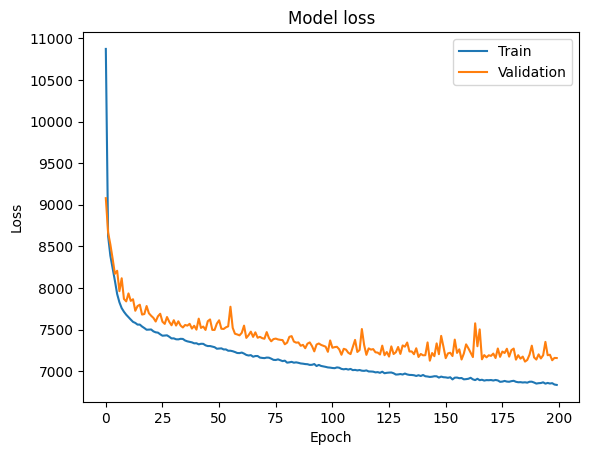

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
model.save('model_final.h5')

In [ ]:
user_input = pd.DataFrame({
    'PM2.5': [75],
    'PM10': [120],
    'NO': [40],
    'NO2': [35],
    'NOx': [50],
    'NH3': [30],
    'CO': [0.7],
    'SO2': [20],
    'Toluene': [1.2],
})

user_input_scaled = scaler.transform(user_input)

user_pred = model.predict(user_input_scaled)

print(f"Predicted AQI: {user_pred[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted AQI: 165.11297607421875
